In [3]:
import arviz as az
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpyro
import numpyro.distributions as dist
from jax import random
from numpyro.infer import MCMC, NUTS


def model(data):
    alpha = jnp.sum(data) / jnp.size(data)
    theta = numpyro.sample('theta', dist.Beta(alpha, 1-alpha))
    obs = numpyro.sample('obs', dist.Bernoulli(theta), obs=data)

In [4]:
D_A = jnp.concatenate([jnp.ones(50, dtype=jnp.int32), jnp.zeros(950, dtype=jnp.int32)])
D_B = jnp.concatenate([jnp.ones(40, dtype=jnp.int32), jnp.zeros(450, dtype=jnp.int32)])

In [5]:
kernel = NUTS(model)
mcmc = MCMC(kernel, num_warmup=1000, num_samples=2000, thinning=1)
rng_key = random.PRNGKey(12345)

In [6]:
mcmc.run(rng_key, data=D_A)

samples_A = mcmc.get_samples()
mcmc.print_summary()

#                mean       std    median      5.0%     95.0%     n_eff     r_hat
#     theta      0.05      0.01      0.05      0.04      0.06    803.64      1.00

sample: 100%|██████████| 3000/3000 [00:04<00:00, 747.59it/s, 1 steps of size 9.58e-01. acc. prob=0.93] 


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     theta      0.05      0.01      0.05      0.04      0.06    803.64      1.00

Number of divergences: 0


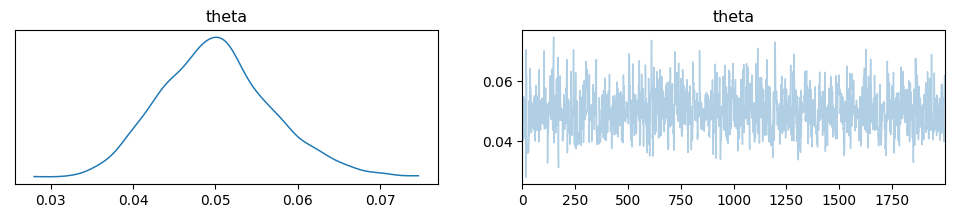

In [7]:
az.plot_trace(az.from_numpyro(mcmc))
plt.show()

In [8]:
mcmc.run(rng_key, data=D_B)

samples_B = mcmc.get_samples()
mcmc.print_summary()

#                mean       std    median      5.0%     95.0%     n_eff     r_hat
#     theta      0.08      0.01      0.08      0.06      0.10    646.78      1.00

sample: 100%|██████████| 3000/3000 [00:02<00:00, 1341.90it/s, 1 steps of size 1.05e+00. acc. prob=0.91]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
     theta      0.08      0.01      0.08      0.06      0.10    646.78      1.00

Number of divergences: 0


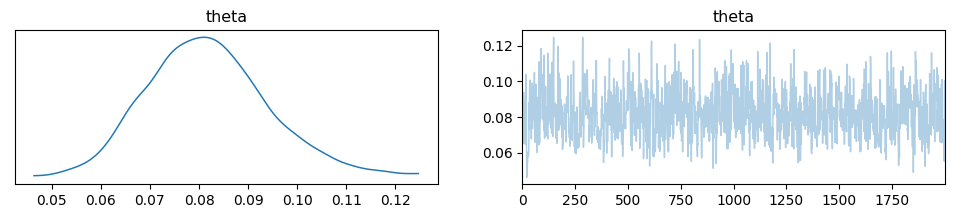

In [9]:
az.plot_trace(az.from_numpyro(mcmc))
plt.show()

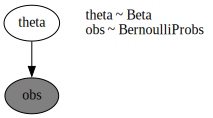

In [11]:
numpyro.render_model(model, model_args=(D_A,), render_distributions=True)